In [1]:
import fastplotlib as fpl
import torch


import numpy as np # to handle matrix and data operation
#import pandas as pd # to read csv and handle dataframe

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
from torch.autograd import Variable

from sklearn.model_selection import train_test_split
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
import tqdm

Detected skylake derivative running on mesa i915. Clears to srgb textures will use manual shader clears.
Detected skylake derivative running on mesa i915. Clears to srgb textures will use manual shader clears.
Detected skylake derivative running on mesa i915. Clears to srgb textures will use manual shader clears.


Image(value=b'version https://git-lfs.github.com/spec/...', height='55', width='300')

Valid,Device,Type,Backend,Driver
✅,Intel(R) Arc(tm) Graphics (MTL),IntegratedGPU,Vulkan,Mesa 24.3.2
✅ (default),NVIDIA GeForce RTX 4060 Laptop GPU,DiscreteGPU,Vulkan,565.77
❗ limited,"llvmpipe (LLVM 19.1.5, 256 bits)",CPU,Vulkan,Mesa 24.3.2 (LLVM 19.1.5)
❌,Mesa Intel(R) Arc(tm) Graphics (MTL),IntegratedGPU,OpenGL,4.6 (Core Profile) Mesa 24.3.2


Detected skylake derivative running on mesa i915. Clears to srgb textures will use manual shader clears.
Detected skylake derivative running on mesa i915. Clears to srgb textures will use manual shader clears.


## Get the device

In [2]:
# check if GPU with cuda is available
if torch.cuda.is_available():
    device = torch.device("cuda")
# if not, use CPU
else:
    device = torch.device("cpu")

In [3]:
device

device(type='cuda')

## Define model architecture

In [4]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=5)
        self.conv3 = nn.Conv2d(32,64, kernel_size=5)
        self.fc1 = nn.Linear(3*3*64, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        #x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(F.max_pool2d(self.conv3(x),2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = x.view(-1,3*3*64 )
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
 
model = CNN().to(device)
print(model)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


## Load the dataset

In [5]:
# tranform to apply to images
transform=transforms.Compose([
        transforms.ToTensor(), # convert to tensor
        transforms.Normalize((0.1307,), (0.3081,)) # normalize with specified mean and sd
        ])

data = datasets.MNIST('../data', train=True, download=True,
                   transform=transform)

train_loader = torch.utils.data.DataLoader(data, batch_size=32, num_workers=1, shuffle=True)

## Sample visual of inputs

RFBOutputContext()

Detected skylake derivative running on mesa i915. Clears to srgb textures will use manual shader clears.


JupyterRenderCanvas(css_height='300.0px', css_width='900.0px')
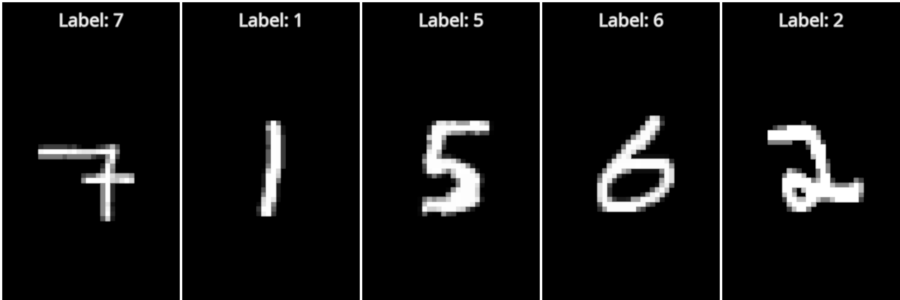

In [6]:
fig_data = fpl.Figure(shape=(1,5), size=(900,300))

# Print the first few images in a row
for j, (image, label) in enumerate(train_loader):
    for i in range(5):
        fig_data[0, i].add_image(image[i].squeeze().numpy(), cmap="gray")
        fig_data[0, i].set_title(f"Label: {label[i].item()}")
        fig_data[0, i].axes.visible = False
        fig_data[0, i].toolbar  = False

    break  # Exit the loop after printing 5 samples

fig_data.show()

## Plot the initial weights

In [7]:
fig_weight = fpl.Figure()

a = model.state_dict()["conv1.weight"].squeeze().reshape(20, 40)

fig_weight[0,0].add_image(a.cpu().numpy(), "viridis", name="weight")

# for i, subplot in enumerate(fig_weight):
#     subplot.axes.visible = False
#     subplot.add_image(data=a[i].cpu().numpy(), cmap="viridis", name="weight")

RFBOutputContext()

'weight': ImageGraphic @ 0x7ff0c1ef96d0

In [8]:
fig_weight.show(sidecar=True)

In [9]:
fig_weight[0,0].axes.visible = False

## Train the model

In [10]:
def train(model, device, train_loader, optimizer, epoch):
    global fig_weight
    model.train()
    correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()

        predicted = torch.max(output.data, 1)[1]
        correct += (predicted == target).sum()
        if batch_idx % 1000 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Accuracy:{:.3f}%'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item(), float(correct*100) / float(32 * (batch_idx + 1))))

In [11]:
optimizer = torch.optim.Adam(model.parameters() ,lr=0.001)

scheduler = StepLR(optimizer, step_size=1)
for epoch in tqdm.tqdm(range(0, 5)):
    train(model, device, train_loader, optimizer, epoch)
    scheduler.step()
    # update the weights 
    a = model.state_dict()["conv1.weight"].squeeze().reshape(20,40).cpu().numpy()
    fig_weight[0,0]["weight"].data = a
    if epoch % 2 == 0:
        fig_weight[0,0]["weight"].cmap = "gray"
    else:
        fig_weight[0,0]["weight"].cmap = "viridis"

  0%|                                                                                                 | 0/5 [00:00<?, ?it/s]

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.355740	 Accuracy:0.000%
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.225816	 Accuracy:89.479%


 20%|█████████████████▊                                                                       | 1/5 [00:04<00:19,  4.88s/it]

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.211738	 Accuracy:96.875%
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.006923	 Accuracy:97.340%


 40%|███████████████████████████████████▌                                                     | 2/5 [00:09<00:14,  4.68s/it]

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.153109	 Accuracy:93.750%
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.148585	 Accuracy:97.812%


 60%|█████████████████████████████████████████████████████▍                                   | 3/5 [00:14<00:09,  4.75s/it]

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.167706	 Accuracy:96.875%
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.033305	 Accuracy:97.743%


 80%|███████████████████████████████████████████████████████████████████████▏                 | 4/5 [00:18<00:04,  4.70s/it]

Train Epoch: 4 [0/60000 (0%)]	Loss: 0.008563	 Accuracy:100.000%
Train Epoch: 4 [32000/60000 (53%)]	Loss: 0.028307	 Accuracy:97.933%


100%|█████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:23<00:00,  4.69s/it]


In [12]:
epoch

4

In [12]:
for name, param in model.named_parameters():
    if 'weight' in name:
        print(f"Layer: {name}, Shape: {param.shape}")
        print("Weights:")
        print(name)
        # print(param.data)

Layer: conv1.weight, Shape: torch.Size([32, 1, 5, 5])
Weights:
conv1.weight
Layer: conv2.weight, Shape: torch.Size([32, 32, 5, 5])
Weights:
conv2.weight
Layer: conv3.weight, Shape: torch.Size([64, 32, 5, 5])
Weights:
conv3.weight
Layer: fc1.weight, Shape: torch.Size([256, 576])
Weights:
fc1.weight
Layer: fc2.weight, Shape: torch.Size([10, 256])
Weights:
fc2.weight


RFBOutputContext()

In [20]:
a = model.state_dict()["conv1.weight"].squeeze().reshape(20, 40).cpu().numpy()
a.shape

(20, 40)

In [21]:
fig_weight[0,0]["weight"].data = a